# Project Title: Facial Emotion Recognition for Mental Wellness Monitoring
### Goal:
 Build and deploy a system that detects human emotions (e.g. happy, sad, angry, neutral) from facial images to help mental health apps understand users’ emotional states in real time.

### Why this matters:
 Emotional monitoring can help improve chatbot responses, tailor wellness content, and alert when users show signs of distress.


In [1]:
# Install Kaggle API package to access dataset
!pip install -q kaggle

In [2]:
# Upload kaggle.json (file containing Kaggle API key)

In [3]:
# Setup Kaggle credentials
# Move kaggle.json to correct location
!mkdir -p ~/.kaggle  #  Create hidden folder for Kaggle configuration
!cp kaggle.json ~/.kaggle/ # Copy the token there
!chmod 600 ~/.kaggle/kaggle.json # Set permissions (only you can read it)

print(" Kaggle API configured successfully")

 Kaggle API configured successfully


In [4]:
# Download FER-2013 dataset from Kaggle
print(" Downloading FER-2013 dataset from Kaggle...")
!kaggle datasets download -d msambare/fer2013

print(" Download complete")

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 686MB/s]
 Download complete


In [5]:
# Unzip the dataset
import zipfile
import os

# Unzip dataset
print(" Unzipping dataset...")
with zipfile.ZipFile('fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

print(" Dataset extracted")

# Check folder structure
print("\n Folder structure:")
for root, dirs, files in os.walk('data'):
    level = root.replace('data', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    if level < 2:  # Only show 2 levels deep
        subindent = ' ' * 2 * (level + 1)
        for file in files[:3]:  # Show first 3 files
            print(f'{subindent}{file}')
        if len(files) > 3:
            print(f'{subindent}... and {len(files) - 3} more files')

 Unzipping dataset...
 Dataset extracted

 Folder structure:
data/
  train/
    sad/
    happy/
    neutral/
    surprise/
    angry/
    disgust/
    fear/
  test/
    sad/
    happy/
    neutral/
    surprise/
    angry/
    disgust/
    fear/


In [6]:
# Explore the dataset to understand the data before training
import os

# Count images per emotion
def count_images(base_path):
    """Count images in each emotion folder"""
    emotions = {}
    for emotion in os.listdir(base_path):
        emotion_path = os.path.join(base_path, emotion)
        if os.path.isdir(emotion_path):
            num_images = len(os.listdir(emotion_path))
            emotions[emotion] = num_images
    return emotions

# Count train and test images
train_counts = count_images('data/train')
test_counts = count_images('data/test')

print("=" * 50)
print(" DATASET STATISTICS")
print("=" * 50)

print("\n TRAINING SET:")
total_train = 0
for emotion, count in sorted(train_counts.items()):
    print(f"  {emotion:12s}: {count:,} images")
    total_train += count
print(f"  {'TOTAL':12s}: {total_train:,} images")

print("\n TEST SET:")
total_test = 0
for emotion, count in sorted(test_counts.items()):
    print(f"  {emotion:12s}: {count:,} images")
    total_test += count
print(f"  {'TOTAL':12s}: {total_test:,} images")

print("\n" + "=" * 50)
print(f" Total dataset: {total_train + total_test:,} images")
print("=" * 50)

 DATASET STATISTICS

 TRAINING SET:
  angry       : 3,995 images
  disgust     : 436 images
  fear        : 4,097 images
  happy       : 7,215 images
  neutral     : 4,965 images
  sad         : 4,830 images
  surprise    : 3,171 images
  TOTAL       : 28,709 images

 TEST SET:
  angry       : 958 images
  disgust     : 111 images
  fear        : 1,024 images
  happy       : 1,774 images
  neutral     : 1,233 images
  sad         : 1,247 images
  surprise    : 831 images
  TOTAL       : 7,178 images

 Total dataset: 35,887 images


In [7]:
# Visualize sample images
# import visualization libraries
import matplotlib.pyplot as plt # Creates plots and displays images. Show images in grid
import cv2 # Computer vision library. Load and process images
import numpy as np # Array operations. Handle image data (pixels)
import random # Random selection. Pick random images to show
from PIL import Image # Image processing. Alternative image loading

print(" Visualization libraries loaded!")

✅ Visualization libraries loaded!


In [8]:
# Function to load random images
def load_random_images(data_dir, emotion, num_images=9):
    """
    Load random images from a specific emotion folder

    WHY THIS FUNCTION:
    - We have thousands of images per emotion
    - Can't look at all of them manually
    - Random sampling gives us a representative view

    Args:
        data_dir: Path to train or test folder
        emotion: Which emotion folder (e.g., 'happy', 'sad')
        num_images: How many random images to show

    Returns:
        List of image arrays
    """
    emotion_path = os.path.join(data_dir, emotion)

    # Get all image filenames in this emotion folder
    # WHY: We need to know what images are available
    image_files = os.listdir(emotion_path)

    # Randomly select num_images from the list
    # WHY: Random = unbiased sample of the data
    selected_files = random.sample(image_files, min(num_images, len(image_files)))

    images = []
    for img_file in selected_files:
        img_path = os.path.join(emotion_path, img_file)

        # Load image using OpenCV
        # WHY: cv2.imread reads image as numpy array (pixels)
        img = cv2.imread(img_path)

        # Convert BGR to RGB
        # WHY: OpenCV loads as BGR, but matplotlib expects RGB
        # BGR = Blue-Green-Red (OpenCV default)
        # RGB = Red-Green-Blue (normal)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img)

    return images

print(" Image loading function created")

 Image loading function created


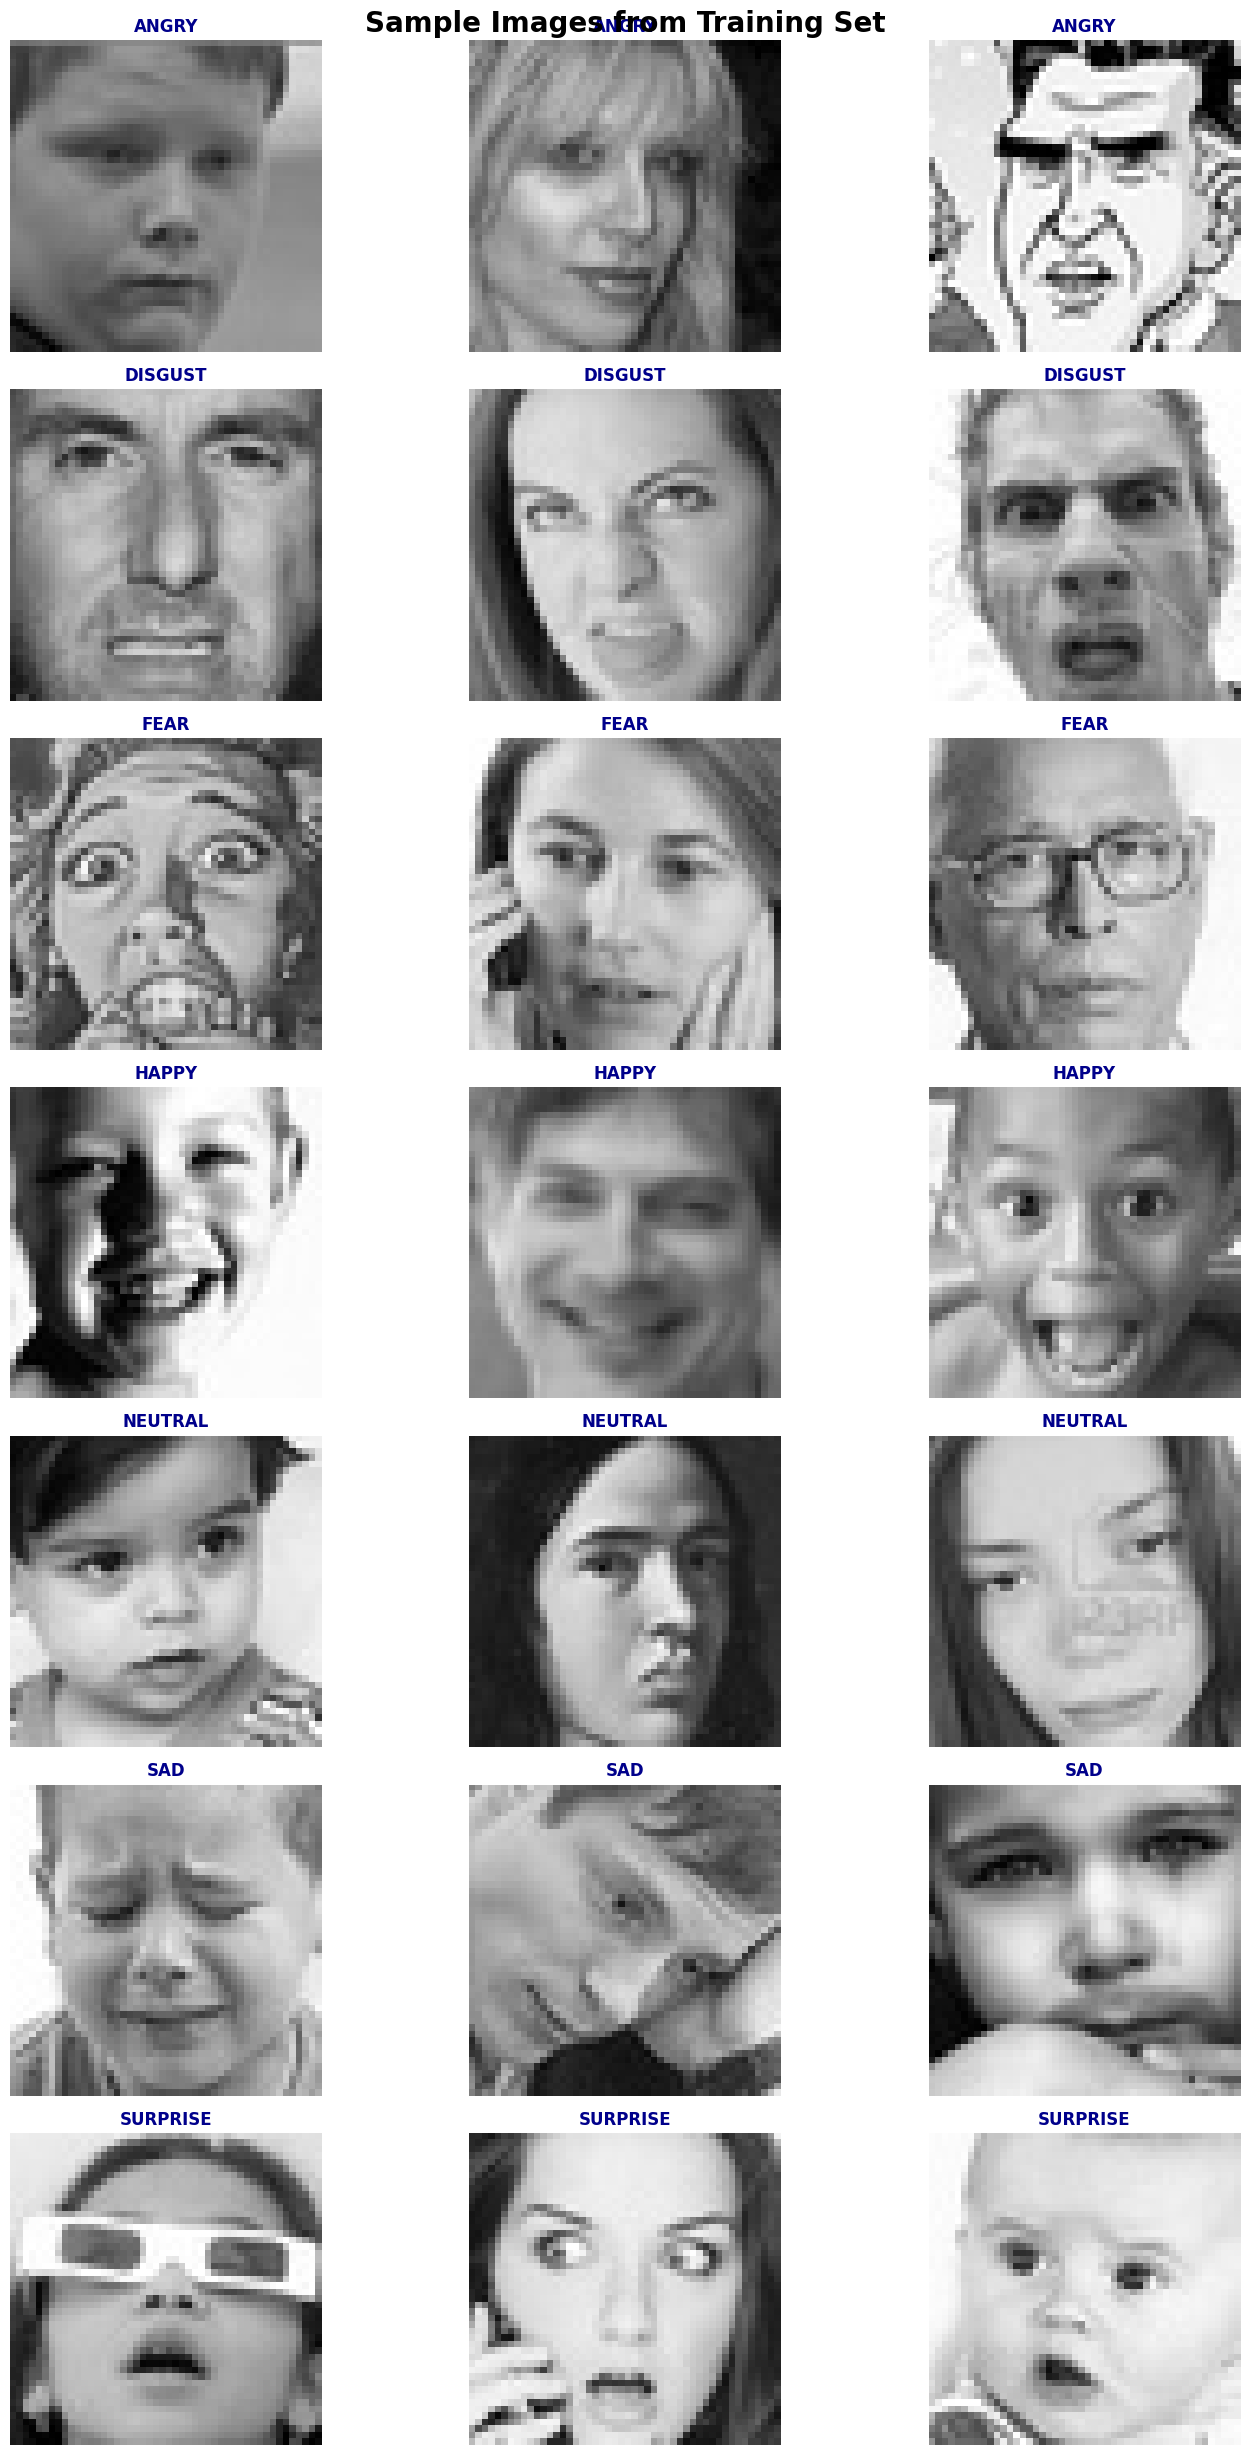

 Visualization complete!


In [10]:
# Visualize some images
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_dir = 'data/train'

fig, axes = plt.subplots(7, 3, figsize=(15, 25))
fig.suptitle('Sample Images from Training Set', fontsize=20, fontweight='bold')

for i, emotion in enumerate(emotions):
    images = load_random_images(train_dir, emotion, num_images=3)

    for j, img in enumerate(images):
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')

        # Label EVERY image
        # WHY: Makes it crystal clear which emotion each image represents
        ax.set_title(f'{emotion.upper()}',
                    fontsize=12,
                    fontweight='bold',
                    color='darkblue')

plt.tight_layout()
plt.show()

print(" Visualization complete!")

In [ ]:
gfesfefghhgfrgedgedgegghhhhhhhhhhhhhhhhhhhh